This notebook shows how to use `ShapExplainer` class of AI4Water. The `ShapExplainer` class is a wrapper around [SHAP](https://github.com/slundberg/shap) library. It helps in making different plots for local as well as global explainations of model 

In [2]:
try:
    import AI4Water
except ImportError:
    !python -m pip install "AI4Water[all] @ git+https://github.com/AtrCheema/AI4Water.git"

In [15]:
import matplotlib.pyplot as plt

In [3]:
from ai4water import Model
from ai4water.datasets import MtropicsLaos
from ai4water.post_processing.explain import ShapExplainer
from ai4water.post_processing.explain import explain_model_with_shap
from ai4water.utils.visualizations import regplot

In [4]:
laos = MtropicsLaos()
data = laos.make_regression()


Not downloading the data since the directory 
D:\mytools\AI4Water\ai4water\datasets\data\MtropicsLaos already exists.
Use overwrite=True to remove previously saved files and download again


preprocessing of shapefiles can not be done because no fiona installation is found.
Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


In [5]:
model = Model(model="XGBoostRegressor",
             data=data)

building ML model for  regression problem using XGBoostRegressor


In [6]:
model.fit()


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)


divide by zero encountered in true_divide
divide by zero encountered in log
invalid value encountered in log


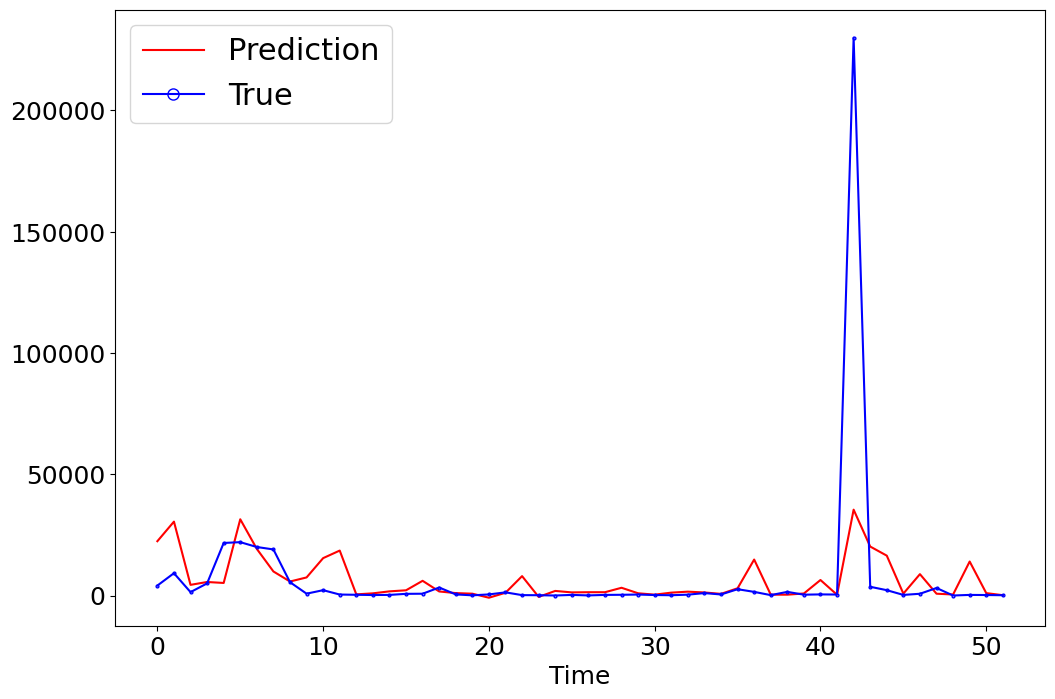

In [7]:
y_true, y_pred = model.predict(return_true=True)

<AxesSubplot:xlabel='Observed', ylabel='Predicted'>

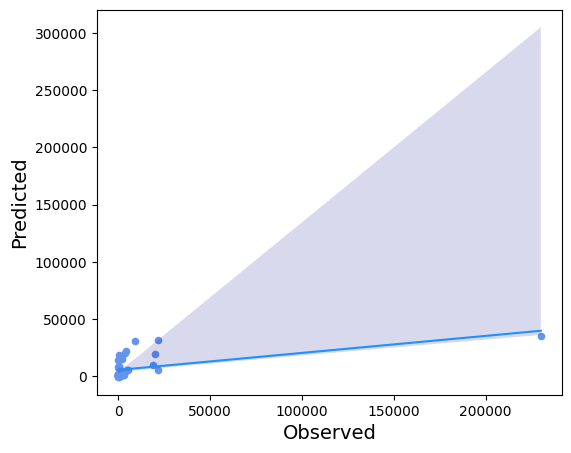

In [8]:
regplot(y_true, y_pred)


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)


divide by zero encountered in true_divide
divide by zero encountered in log


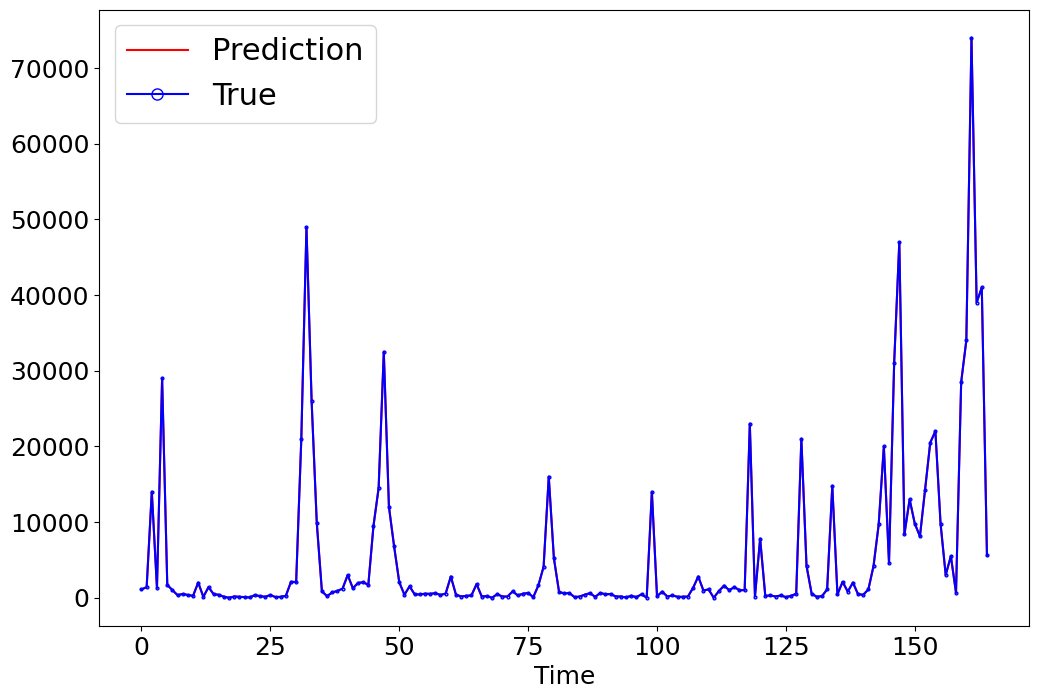

In [9]:
y_true, y_pred = model.predict('training', return_true=True)

<AxesSubplot:xlabel='Observed', ylabel='Predicted'>

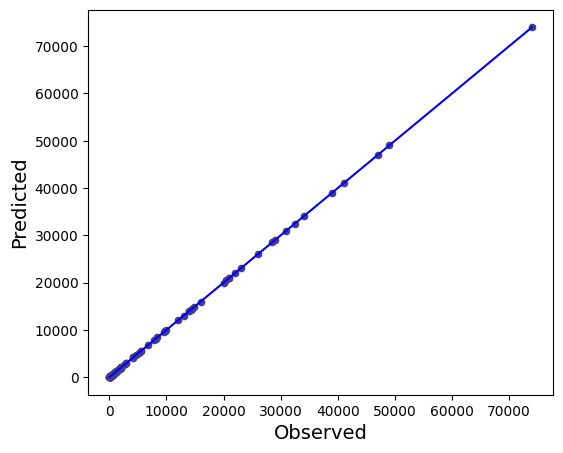

In [11]:
regplot(y_true, y_pred)

In [12]:
train_x, train_y = model.training_data()


********** Removing Examples with nan in labels  **********

***** Training *****
input_x shape:  (165, 7)
target shape:  (165, 1, 1)


In [13]:
test_x, test_y = model.test_data()


********** Removing Examples with nan in labels  **********

***** Test *****
input_x shape:  (52, 7)
target shape:  (52, 1, 1)


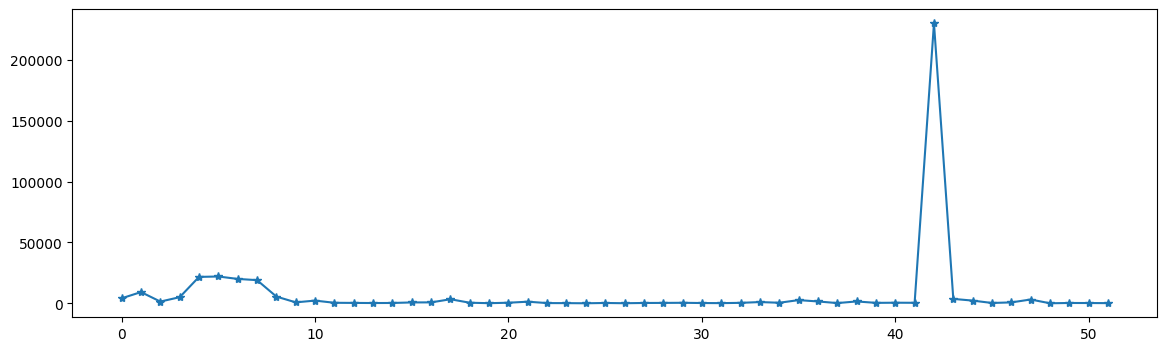

In [16]:
_, axis = plt.subplots(figsize=(14, 4))
axis.plot(test_y.reshape(-1,), '-*')

In [17]:
for idx, val in enumerate(test_y.reshape(-1,)):
    print(idx, val)

0 4100.0
1 9200.0
2 1400.0
3 5000.0
4 21666.666666666668
5 22000.0
6 20000.0
7 19000.0
8 5500.0
9 760.0
10 2200.0
11 400.0
12 300.0
13 200.0
14 250.0
15 690.0
16 740.0
17 3300.0
18 450.0
19 78.0
20 450.0
21 1300.0
22 160.0
23 120.0
24 0.0
25 250.0
26 38.0
27 250.0
28 300.0
29 400.0
30 200.0
31 120.0
32 350.0
33 1000.0
34 430.0
35 2600.0
36 1500.0
37 160.0
38 1500.0
39 340.0
40 460.0
41 400.0
42 230000.0
43 3600.0
44 2200.0
45 250.0
46 720.0
47 3100.0
48 0.0
49 250.0
50 200.0
51 120.0


In [18]:
explainer = ShapExplainer(model._model,
                          test_x,
                          train_data=train_x, # the data on which model was trained
                          path=model.path,
                          features=model.dh.input_features, # names of features
                          num_means=10,
                          explainer="TreeExplainer"
                         )

FixedFormatter should only be used together with FixedLocator


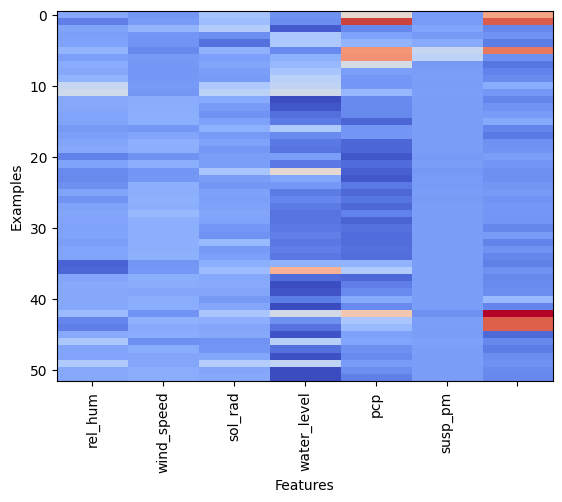

In [19]:
explainer.plot_shap_values()

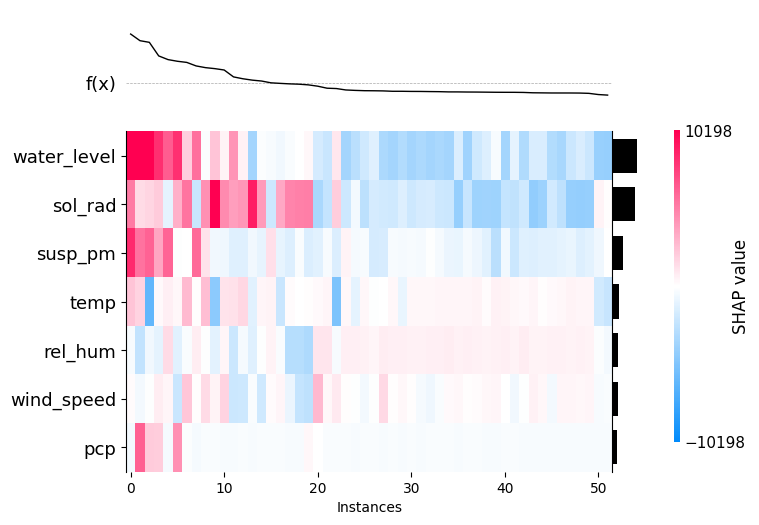

In [21]:
explainer.heatmap()

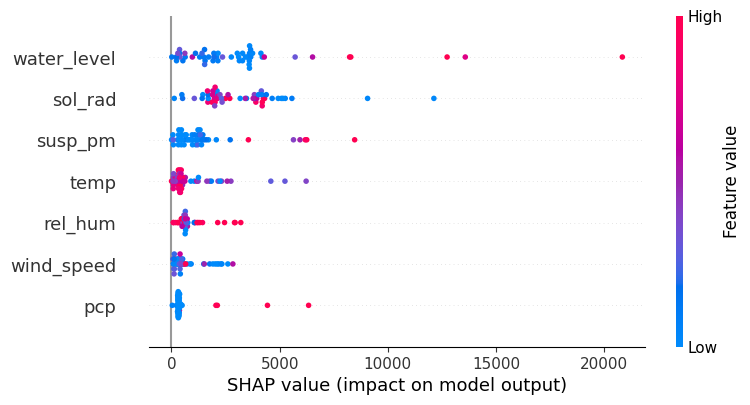

In [29]:
explainer.beeswarm_plot()

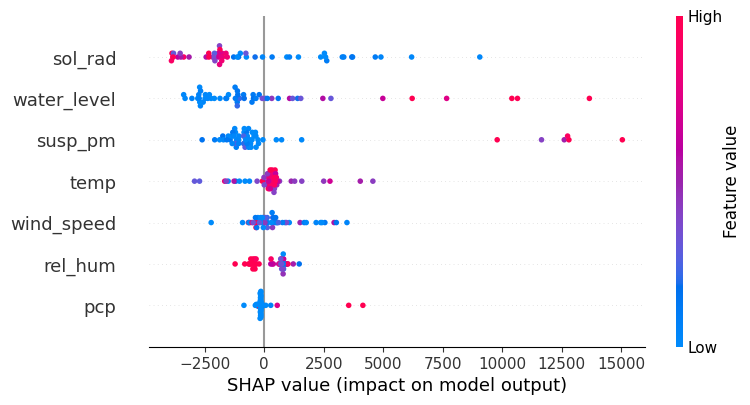

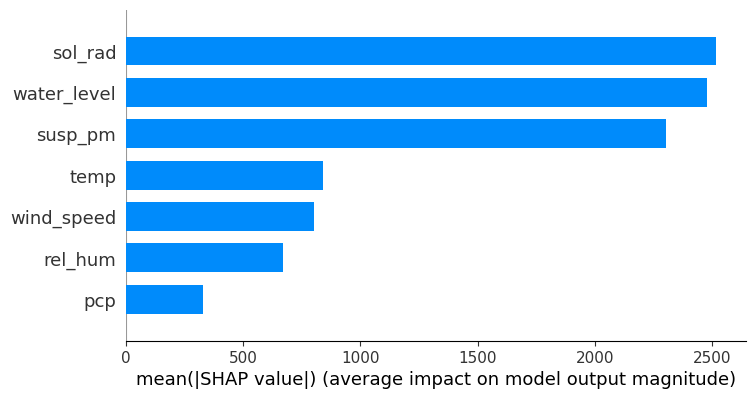

<Figure size 640x480 with 0 Axes>

In [24]:
explainer.summary_plot(show=True)

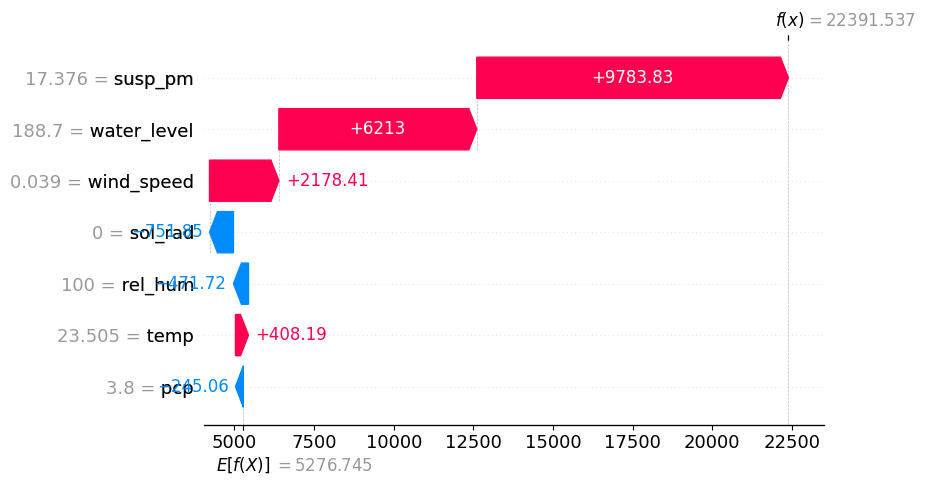

In [25]:
explainer.waterfall_plot_single_example(0)

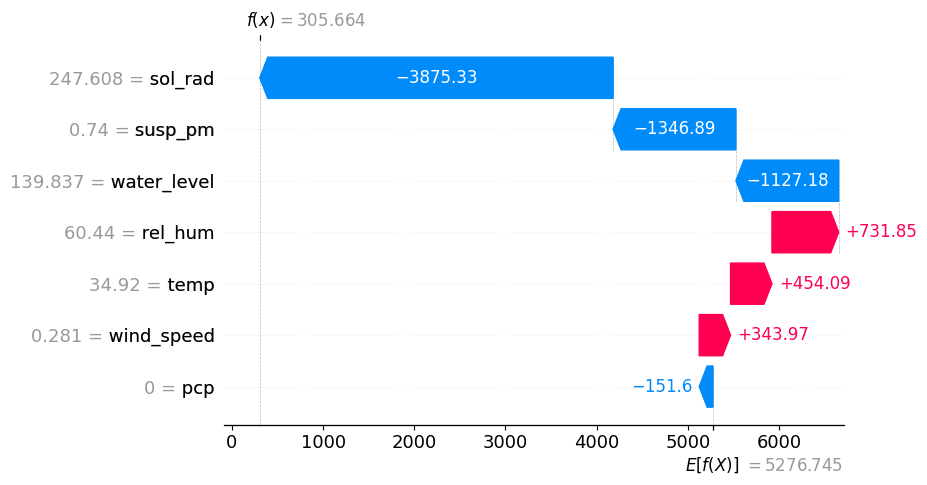

In [26]:
explainer.waterfall_plot_single_example(41)

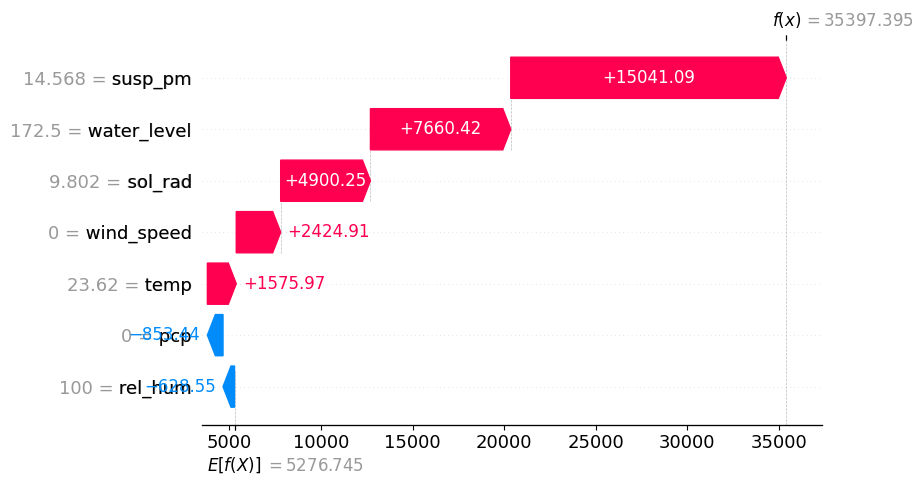

In [27]:
explainer.waterfall_plot_single_example(42)

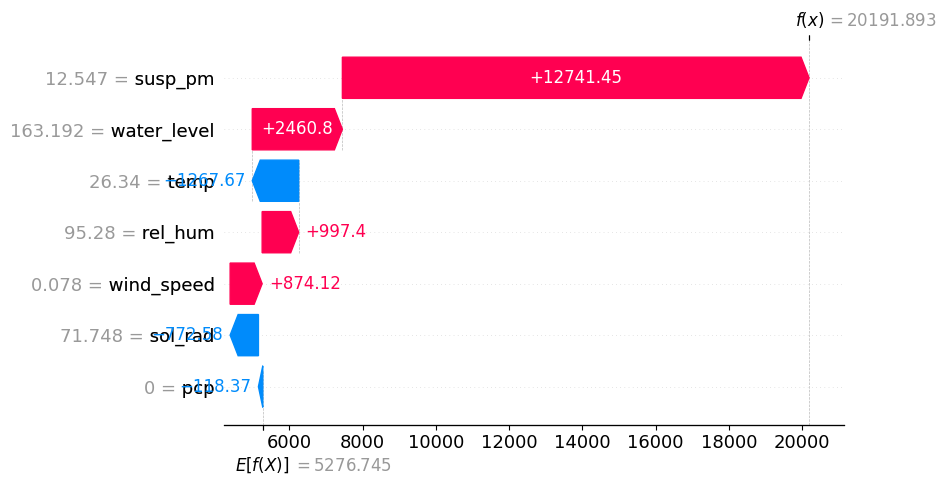

In [28]:
explainer.waterfall_plot_single_example(43)

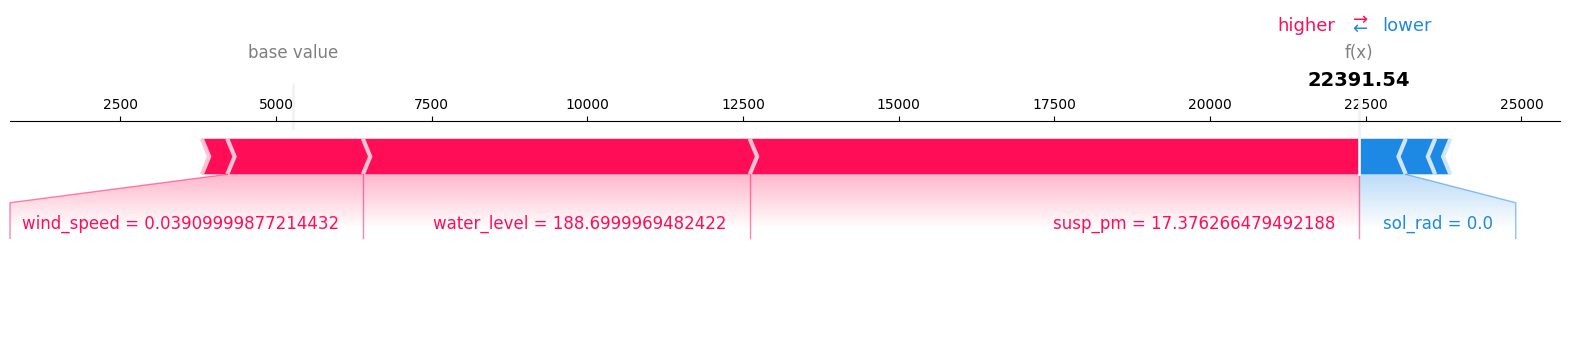

In [31]:
explainer.force_plot_single_example(0)

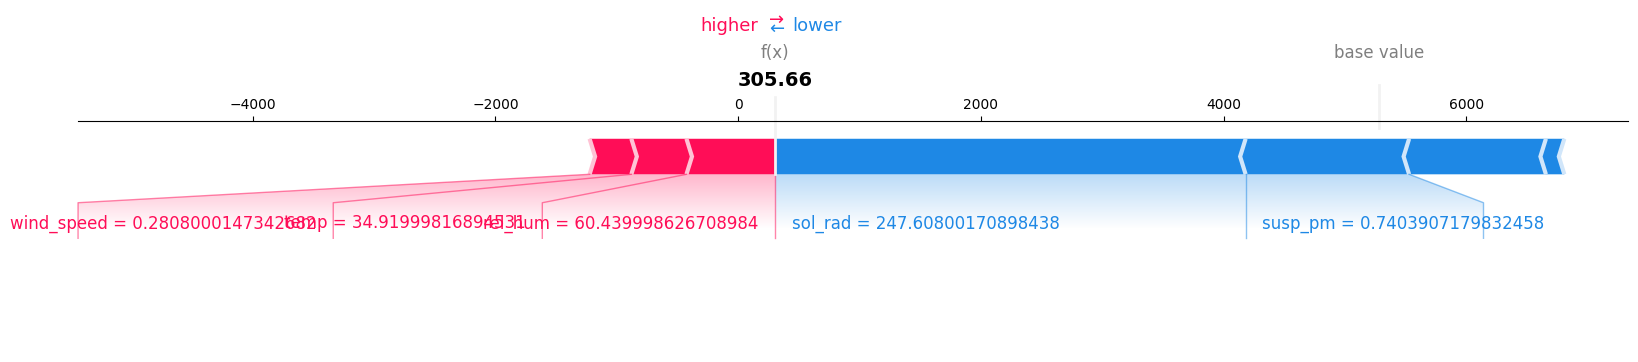

In [32]:
explainer.force_plot_single_example(41)

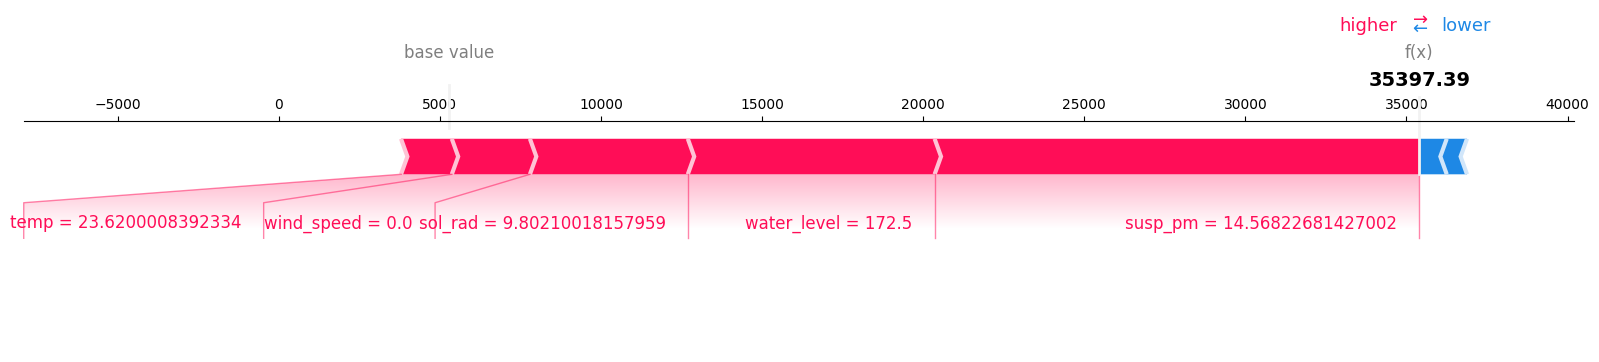

In [33]:
explainer.force_plot_single_example(42)

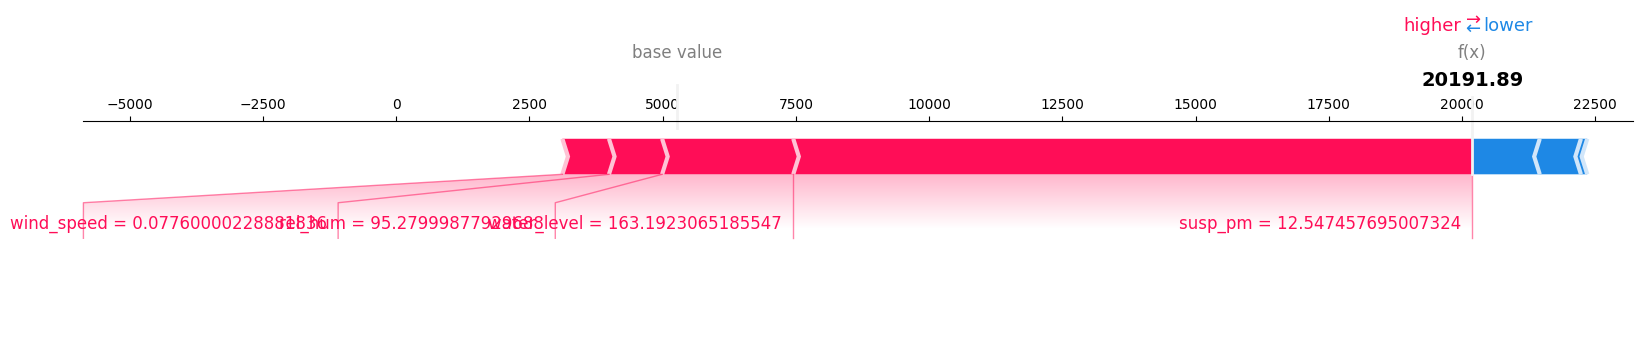

In [34]:
explainer.force_plot_single_example(43)

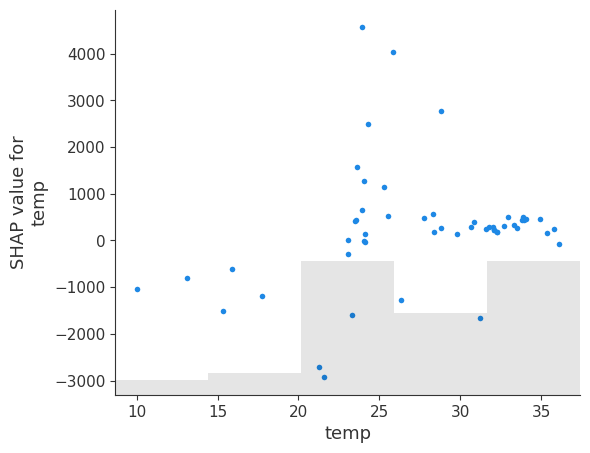

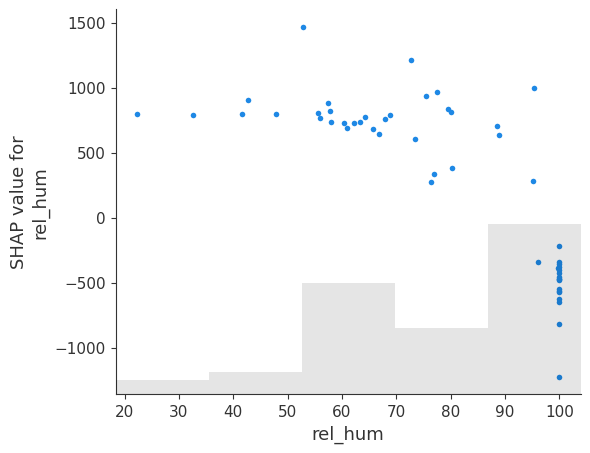

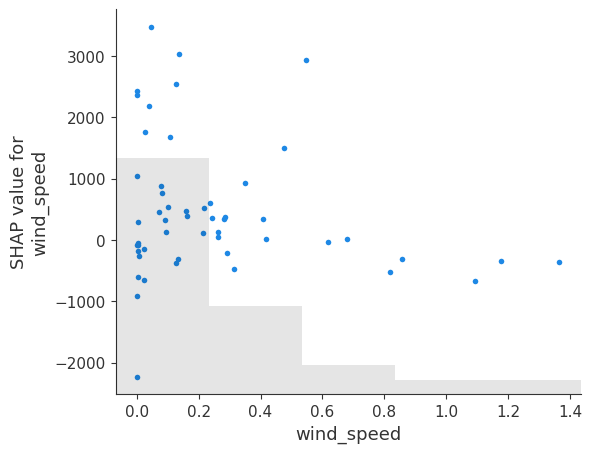

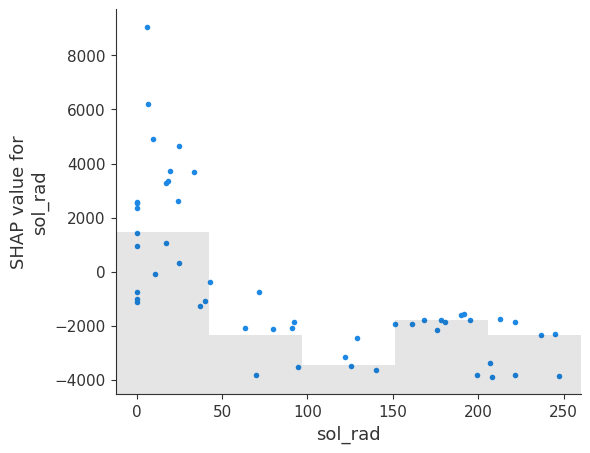

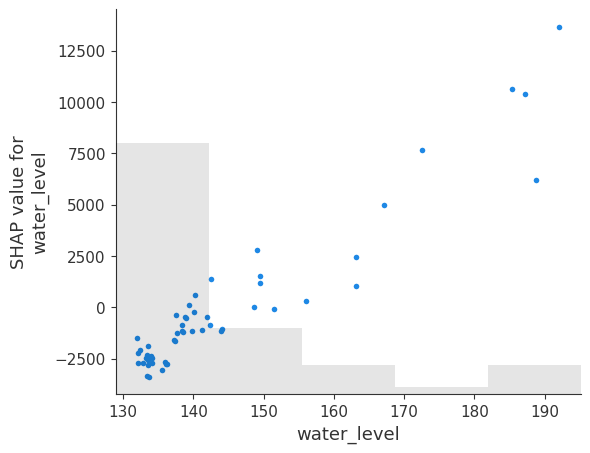

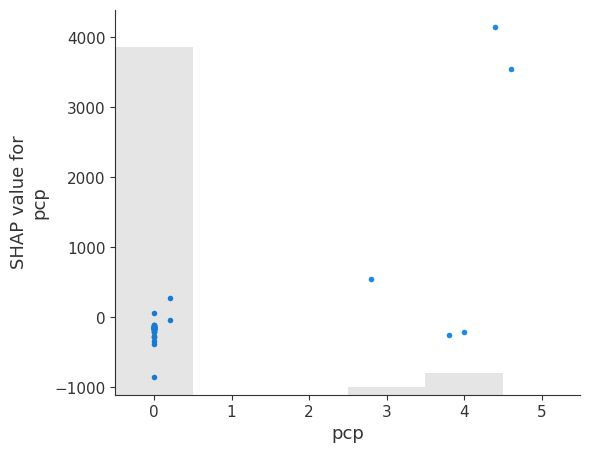

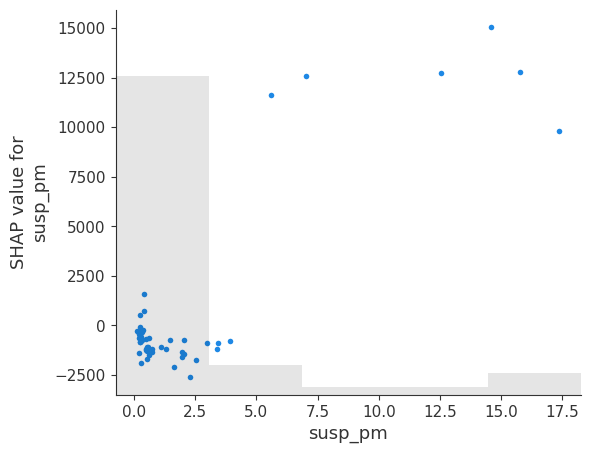

In [35]:
explainer.scatter_plot_all_features()

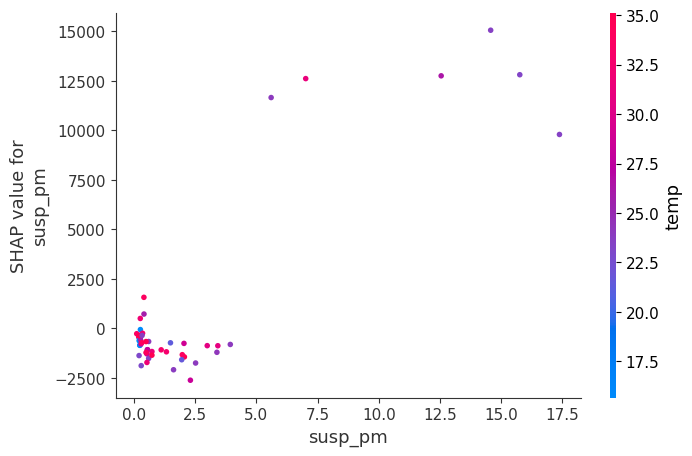

In [36]:
explainer.dependence_plot_single_feature('susp_pm')

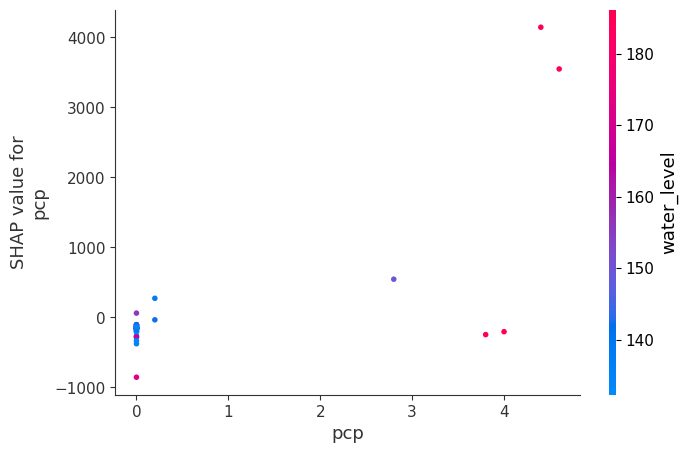

In [37]:
explainer.dependence_plot_single_feature('pcp')

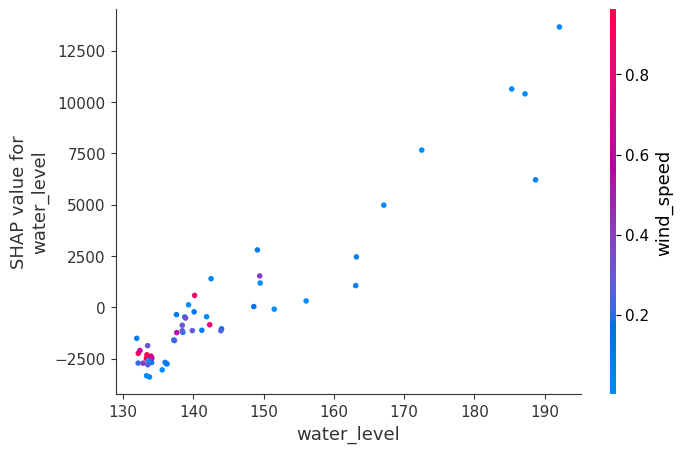

In [38]:
explainer.dependence_plot_single_feature('water_level')